# Context Matters - Clustering

<img src="assets/GPS.jpg" width="500"/>

<img src="assets/UncoloredBlobs.PNG" width="500"/>

Lets begin by asserting that we have collected GPS location data fo various fossil samples. Many times a dinosaur bone fragment may be similiar in color, texture, and details to other fossils - So how can we gain confience that what we found was bone?


# Context matters!

<img src="assets/NGMDB_DNM.jpg" width="500"/>

- Credits: Dinosaur National Monument Geologic Map: https://www.utah.gov/support/disclaimer.html


Consult a geologic map to determine if the fossils you found are within a specified geological context - this will give you an indication of whether you found shark teeth in a marine environment or bones in a terrestrial environment. Also, it will indicate that the specimen you have is from the Triassic, Jurassic, or Cretaceous periods - these are the dinosaur periods. If geologists have already identified that your search area is in the tertiary or the quaternary period then what you found are NOT dinosaurs fossils.

Once you find a cluster of fossils in close proximity, it is more like that the other fossils nearby are from the same or similar specimens or at least from the same time period.

In some cases, we find thousands of samples of petrified wood and no bone.

Other times we find hundreds of bones fragments, but no petrified wood.
Same for shark teeth. Shark teeth areas TEND to exclude bone fragments from being dinosaur bones (but this is not a hard and fast rule)

In some cases, we find petrified wood and crocodilian skutes mingled together and then a few hundred yards away we find dinosaur bones grouped together.

BUT - MANY, MANY times, finding a few definitive bone samples help us conclude the very nearby samples are likely also bone same for shark teeth - find a few definitive ones and the partial fossils are most likely also shark teeth and so on.

# Introduce Intel AI Software Portfolio

For this workshop we will be using Intel AI Analytics Toolkit (Intel Extensions for scikit-learn* and Intel Extensions for PyTorch) for preprocessing and training, and Intel OpenVINO(tm) for inference.

<img src="assets/IntelSWPortfolio.PNG" width="800"/>

We will Discuss OpenVINO(tm) in unit 9.

In this unit, we introduce Intel AI Analytics Toolkit

# Intel AI Analytics Toolkit

<img src="assets/Intel AI Analytics Toolkit Components.PNG" width="800"/>

In this notebook we will apply Intel Extensions for scikit-learn to accelerate commonly used machine learning algorithms.

Intel has provided accelerated versions of many common algorithms such as PCA, tSNE, KNN, Random Forest, SVM, Train_Test_Split, Linear Regression, ElasticNet, Ridge, Lasso, Nearest Neighbor, KMeans, DBSCAN and more

<img src="assets/scikit-learn-acceleration-2021.2.3.png" width="800"/>

**See [link](https://github.com/intel/scikit-learn-intelex)** for more information regarding potential acceleration.

# Goal: Identify clusters

What we would like is to plot our GPS coordinates and look for patterns suggesting that fossils which are clustering together.

In some cases, the clusters will overlap, but in many other cases, the clusters tend to reveal that fossil of similar nature are found together.

### In the real world, 

We typically cannot identify each fossil specifically
- the fossil is too small (shape does not help)
- the fossil is too similar to other types of fossils
- too many species were buried in the same area

### The point is: Our map typically looks like this 

Because we don’t even know what kinds of fossils we actually have, our first step is to identify any naturally occurring clusters. Since we don’t yet have any other information about the fossils - they are all colored the same - gray.

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


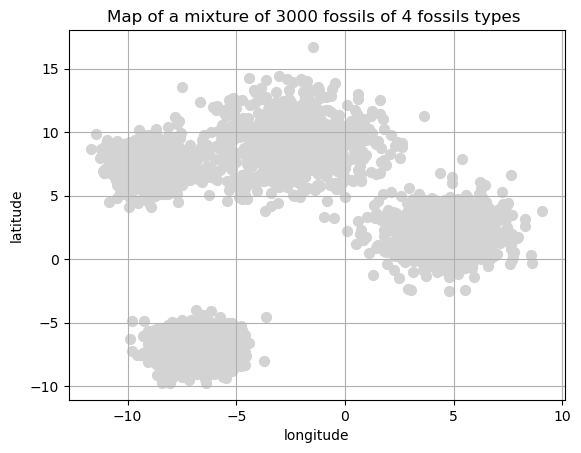

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import make_blobs
n_components = 4
n_samples = 3000
labels = ['bone', 'shark teeth', 'crocodilian', 'petrified wood']

X, truth = make_blobs(n_samples=n_samples, centers=n_components, 
                      cluster_std = [2, 1.5, 1, 1], 
                      random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=50, c = 'lightgray')
plt.title(f"Map of a mixture of 3000 fossils of {n_components} fossils types ")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid()

# Clustering with KMeans 

For simple distributions like the one above, we might try to cluster via Kmeans.

FYI: Applying the patch_sklearn() from the Intel Extensions for Scikit-learn* yields a speedup of 4 to 5X during the fitting of the model.


## Exercise: patch subsequent imports from sklearn. Just be sure to patch before you import from sklearn

The Intel Extensions for Scikit-learn accelerate select functions in scikit-learn such as k-means, DBSCAN, PCA, random forest, SVC, K nearest neighbor, and more.

It is implemented via a patching construct

After installing Intel Extensions for Scikit-learn (not necessary on Intel DevCloud), simply import and patch BEFORE you import your desired scikit-learn algorithms:

Add these lines **BEFORE** the import of KMeans in order to apply the patch

```python
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
```

These two lines can accelerate commonly used ML algorithms enormously! 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


elapsed: 0.10440993309020996 seconds


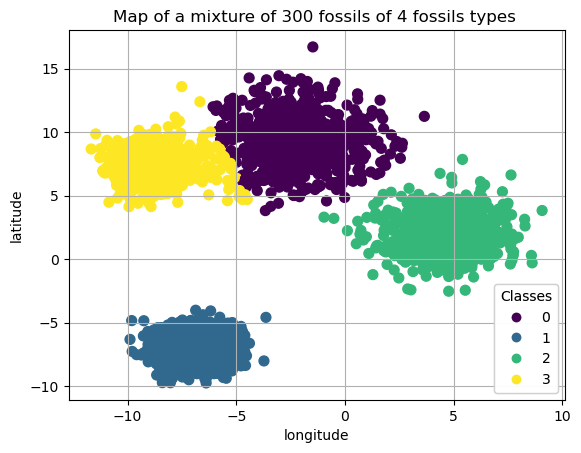

In [2]:
### Insert code here: replace the Broken_Code with patch above

from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()

########

from sklearn.cluster import KMeans
import time

start = time.time()
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print(f"elapsed: {time.time() - start} seconds")
kmeans.labels_

fig, ax = plt.subplots()

scatter = plt.scatter(X[:, 0], X[:, 1], s=50, c = kmeans.labels_)
plt.title(f"Map of a mixture of 300 fossils of {n_components} fossils types ")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid()

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.show()
i =0

labels = kmeans.labels_

index = {}
# create a dictionary to track indexes of each laebels class
# identified by clustering
for i in range(4):
    index[i] = np.where(labels == i)
    
# there are 40 to 60 points in each cluster



# Context! 

Now identification has gotten easier

Identify one or two of these samples as dinosaur bone and chances are good the rest of the pile are bones too!

<img src="assets/BlackBones20150319_1315IMG_6255.jpg" width="500"/>

We can take photographs, video, GPS coordinates, measurements and head back for an internet search to try to identify a even a small number of fossils from each cluster. We can choose the best specimens, or the most representative, or the ones with outer curved surfaces that may help identify the specimen

**Context** can help identify the other unknown fossils once we get a positive identification of a few specimens.

For a fun way to think about geological context, I recommend the video "FROM THE EARTH TO THE MOON (1998): SEASON 1, EPISODE 10 - GALILEO WAS RIGHT". This episode recounts the Apollo 15 astronauts and backup crew go through extensive geology training in preparation for their mission. Dr. Leon (Lee) Silver articulates the importance of context in a geological setting. Context is vital for identifying dinosaur bones as well.

The problem with KMeans is that every time we run it - it may assign a different cluster ID to each point so sometime the blob at the lower left will be identified as cluster 2 and other runs it will be identified as cluster 3 for example.

So it has given us great insight and gotten us to a point where we might classify these points in a more consistent way.


# Classifier Will Color Sites Consistently


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.10562014579772949 seconds


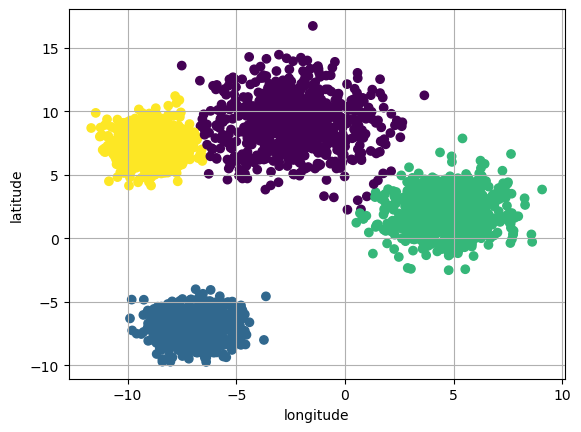

In [3]:
# let’s use 8 points from each class to create a classifier
# The classifier uses 8 values of X and 8 values of y for each class 
# to fit a classifier model to the data
# Then we can use the classifier to predict 
# a bone type based on locality of the find

from sklearnex import patch_sklearn
patch_sklearn()

X_train = X[index[0][0][:80]]
X_train =  np.append(X_train, X[index[1][0][:8]], axis = 0)
X_train =  np.append(X_train, X[index[2][0][:8]], axis = 0)
X_train =  np.append(X_train, X[index[3][0][:8]], axis = 0)

y_train = labels[index[0][0][:80]]
y_train =  np.append(y_train, labels[index[1][0][:8]], axis = 0)
y_train =  np.append(y_train, labels[index[2][0][:8]], axis = 0)
y_train =  np.append(y_train, labels[index[3][0][:8]], axis = 0)

patch_sklearn("SVC") # patch SVC algo 
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # accelerated with Intel Extensions for Scikit-learn
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
start = time.time()
clf.fit(X_train,  y_train.ravel())
y_pred = clf.predict(X)
print(f"{time.time() - start} seconds")
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid()

# Kernel Density Estimation

Let’s say that often when you get home, you drop your keys and relax for dinner. Later you decide to drive to a grocery store for snacks. You've lost your keys!

But you have lost your keys many times before and have kep a reocrd of exactly where you found them over the course of time

It seems reasonable that the likelihood of finding your keys near to locations you found them previously is high. Finding them in your dining room, living room, bathroom, bedroom each have historical probabilites.

On the other hand, seeing as you've never been to Nome Alaska, your likelyhood of finding your keys there is very nearly zero.

Even if you have never found your keys in the bathroom before, it makes sense that the probability of finding keys in the bathroom is higher than finding your keys in Nome.  There is a sense in which the density of finds and nearby locations have higher probablities than locations very, very far away.

This is similar to finding dinosaur bones, petrified wood, prehistoric shark teeth, prehistoric crocodilian remains.  The probability of finding a dinosaur bone is higher when other dinosaur bones have been found nearby

This is where clustering and kernel density estimation can help to determine what a given sample of likely to be and how likely it is to find a bone in a particular location 






In [4]:
# Extract x and y
x = X[:, 0]  # n_smaples is number of bone locations
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()]) # stack into 1D for KDE calc
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape) # reshape to 2D

-13.744845898875743 11.137008326288184 -12.380184792749148 19.365197646076574


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

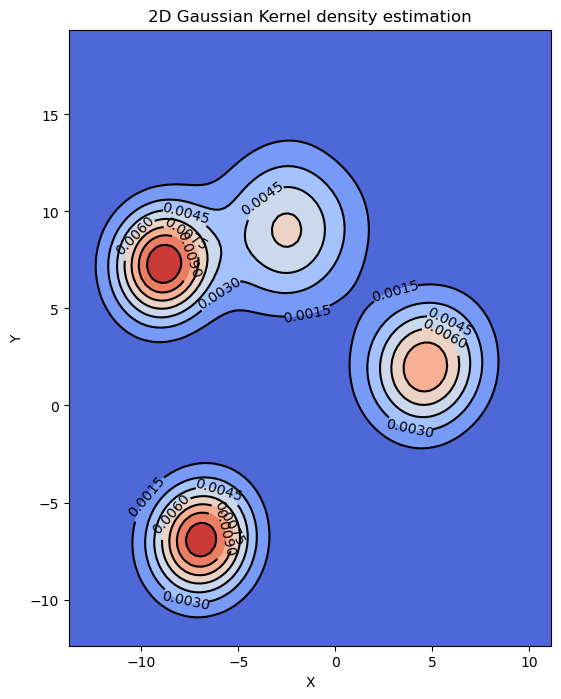

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

# Normalize the highest peak

Probability of 1 at the max location - like 100% chance Mammoth Mesa

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

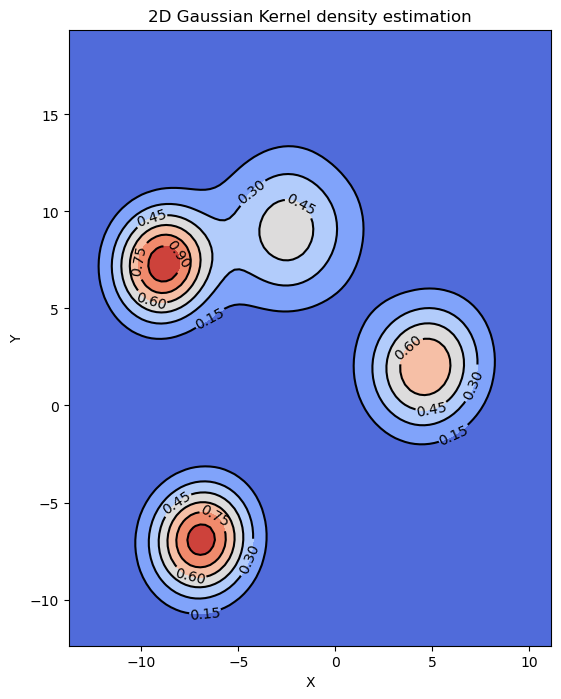

In [6]:
fNorm = f/f.max()
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, fNorm, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, fNorm, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

# KMeans Acceleration check

In [7]:
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()

import numpy as np
import scipy.stats as st
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time
n_components =3
cluster_std = [2, 1.5, 1, 1, .5, .2, .1, .05]
X, truth = make_blobs(n_samples=1000_000, centers=n_components, 
                      cluster_std = cluster_std[:n_components], 
                      random_state=42)


from sklearn.cluster import KMeans
import time
start = time.time()
kmeans = KMeans(n_clusters= n_components, random_state=0).fit(X)
patchedTime = time.time() - start
print(f"elapsed patched Time: {patchedTime} seconds")
kmeans.labels_

unpatch_sklearn()
from sklearn.cluster import KMeans
start = time.time()
kmeans = KMeans(n_clusters= n_components, random_state=0).fit(X)
unpatchedTime = time.time() - start
print(f"elapsed UNpatched Time: {unpatchedTime} seconds")
kmeans.labels_
print(f"Acceleration: {unpatchedTime/patchedTime:4.1f} X")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


elapsed patched Time: 0.08591771125793457 seconds


/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


elapsed UNpatched Time: 1.096947431564331 seconds
Acceleration: 12.8 X


If you have any issues or want to contribute, please contact our authors:
Intel oneAPI Solution Architect
- Chesebrough, Bob [bob.chesebrough (at) intel.com]


# Credits:

- Photography and videos provided by Bob, Ben, & Sam Chesebrough
- Morrison Exposure US Map: Hand drawn estimation of Jurrasic locations in the Western United States by Bob Chesebrough
- Dinosaur National Monument Geologic Map: https://www.utah.gov/support/disclaimer.html

## Notices and Disclaimers

Intel technologies may require enabled hardware, software or service activation.

No product or component can be absolutely secure. 

Your costs and results may vary. 

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. Other names and brands may be claimed as the property of others. 